In [19]:
%load_ext autoreload
%autoreload 2

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
import warnings
import os

import pandas as pd
import numpy as np
import bnlearn as bn

import matplotlib.pyplot as plt
import seaborn as sns

# Add src to sys.path, assuming it is in the parent directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from src.custom_utils import *

warnings.filterwarnings('ignore')

## Model

In [43]:
edges = [('resources', 'duration-feature-complete'),
        ('resources', 'duration-beta-testing'),
        ('resources', 'duration-general-release'),
        ('duration-feature-complete', 'risk-feature-complete'),
        ('duration-beta-testing', 'risk-beta-testing'),
        ('duration-general-release', 'risk-general-release'),
        ('resources', 'cost'),
        ('resources', 'people'),
        ('resources', 'technology')]

### CPD

Resources:

* Low, medium, high

Duration variables:

* Less than a week, 1-2 weeks, 2 weeks - a month, more than a month

Risk variables:

* Low, high

Cost:

* Low, medium, high

People and technology:

* Insufficient and sufficient

In [44]:
# For 'resources'
cpd_resources = TabularCPD(variable='resources', variable_card=3,
                           values=[[0.4], [0.4], [0.2]])

# For 'duration-feature-complete'
cpd_duration_fc = TabularCPD(variable='duration-feature-complete', variable_card=4,
                             values=[[0.2, 0.3, 0.3],
                                     [0.3, 0.3, 0.1],
                                     [0.3, 0.3, 0.4],
                                     [0.2, 0.1, 0.2]],
                             evidence=['resources'], evidence_card=[3])

# For 'duration-beta-testing'
cpd_duration_bt = TabularCPD(variable='duration-beta-testing', variable_card=4,
                                    values=[[0.2, 0.1, 0.4],
                                            [0.3, 0.1, 0.4],
                                            [0.3, 0.4, 0.0],
                                            [0.2, 0.4, 0.2]],
                             evidence=['resources'], evidence_card=[3])

# For 'duration-general-release'
cpd_duration_gr = TabularCPD(variable='duration-general-release', variable_card=4,
                             values=[[0.0, 0.1, 0.3],
                                     [0.1, 0.1, 0.4],
                                     [0.8, 0.1, 0.2],
                                     [0.1, 0.7, 0.1]],
                             evidence=['resources'], evidence_card=[3])

# For 'risk-feature-complete'
cpd_risk_fc = TabularCPD(variable='risk-feature-complete', variable_card=2,
                          values=[[0.6, 0.2, 0.2, 0.1],
                                  [0.4, 0.8, 0.8, 0.9]],
                          evidence=['duration-feature-complete'], evidence_card=[4])

# For 'risk-beta-testing'
cpd_risk_bt = TabularCPD(variable='risk-beta-testing', variable_card=2,
                          values=[[0.7, 0.4, 0.2, 0.5],
                                  [0.3, 0.6, 0.8, 0.5]],
                          evidence=['duration-beta-testing'], evidence_card=[4])

# For 'risk-general-release'
cpd_risk_gr = TabularCPD(variable='risk-general-release', variable_card=2,
                          values=[[0.8, 0.9, 0.5, 0.5],
                                  [0.2, 0.1, 0.5, 0.5]],
                          evidence=['duration-general-release'], evidence_card=[4])

# For 'cost'
cpd_cost = TabularCPD(variable='cost', variable_card=3,
                        values=[[0.4, 0.3, 0.3],
                                [0.3, 0.4, 0.3],
                                [0.3, 0.3, 0.4]],
                        evidence=['resources'], evidence_card=[3])

# For 'people'
cpd_people = TabularCPD(variable='people', variable_card=2,
                         values=[[0.7, 0.3, 0.5],
                                 [0.3, 0.7, 0.5]],
                         evidence=['resources'], evidence_card=[3])

# For 'technology'
cpd_technology = TabularCPD(variable='technology', variable_card=2,
                                values=[[0.2, 0.4, 0.5],
                                        [0.8, 0.6, 0.5]],
                                evidence=['resources'], evidence_card=[3])

model = bn.make_DAG(edges, CPD=[cpd_resources, cpd_duration_fc, cpd_duration_bt, cpd_duration_gr,
                                cpd_risk_fc, cpd_risk_bt, cpd_risk_gr, cpd_cost, cpd_people, cpd_technology])

# Check model
bn.check_model(model)

[bnlearn] >bayes DAG created.
[bnlearn] >Add CPD: resources
[bnlearn] >Add CPD: duration-feature-complete
[bnlearn] >Add CPD: duration-beta-testing
[bnlearn] >Add CPD: duration-general-release
[bnlearn] >Add CPD: risk-feature-complete
[bnlearn] >Add CPD: risk-beta-testing
[bnlearn] >Add CPD: risk-general-release
[bnlearn] >Add CPD: cost
[bnlearn] >Add CPD: people
[bnlearn] >Add CPD: technology
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >CPD [duration-feature-complete] does not add up to 1 but is: [1. 1. 1.]
[bnlearn] >CPD [duration-general-release] does not add up to 1 but is: [1. 1. 1.]
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True
[bnlearn] >Check whether CPDs sum up to one.
[bnlearn] >CPD [duration-feature-complete] does not add up to 1 but is: [1. 1. 1.]
[bnlearn] >CPD [duration-general-release] does not add up to 1 but is: [1. 1. 1.]
[bnlearn] >Check whether CPDs associated with the nodes are consistent: True


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


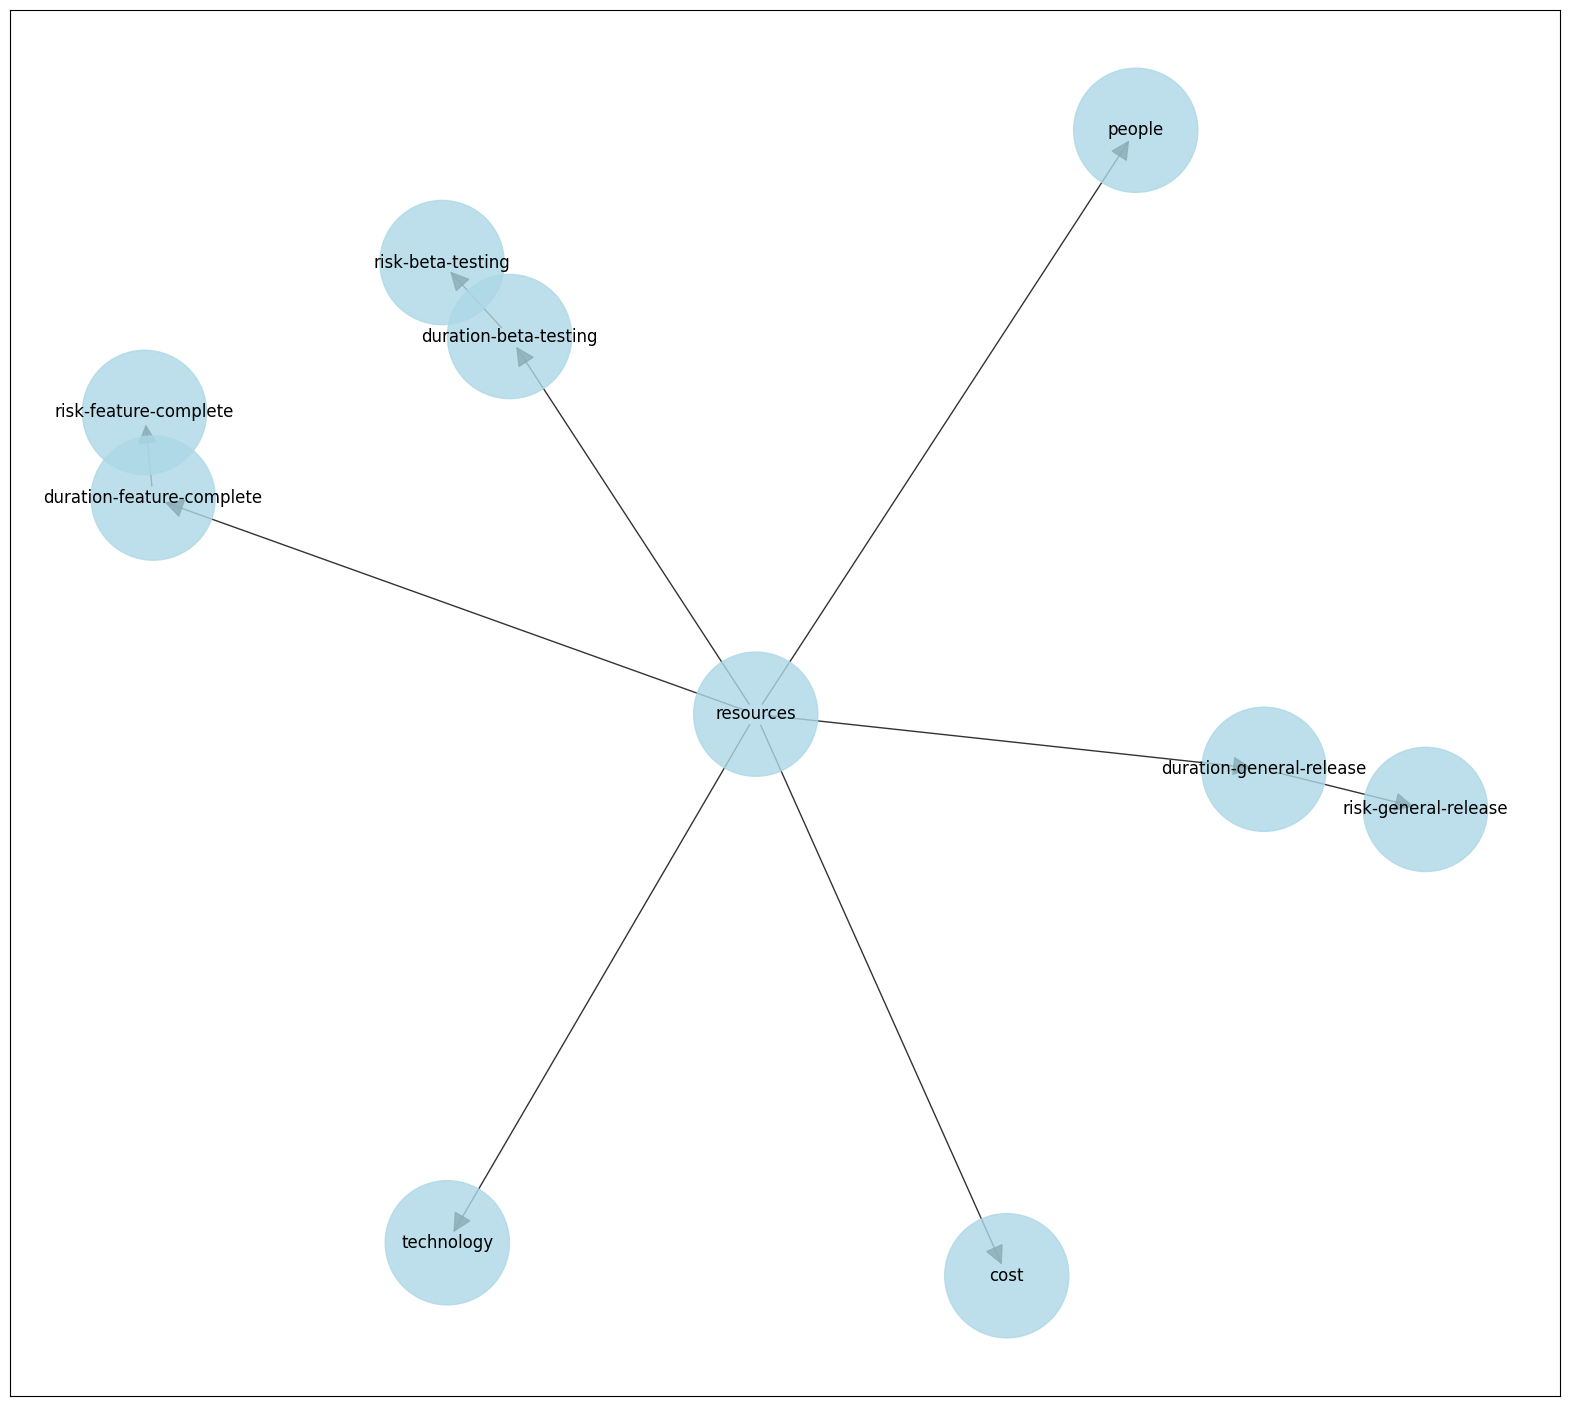

In [42]:
bn.plot(model, params_static={'font_size': 12, 'figsize': (20, 18)}, node_color='lightblue', node_size=8000);

In [46]:
# Print CPDs
cpd = bn.print_CPD(model)

[bnlearn] >Data is stored in [query.df]
+----+-------------+-----+
|    |   resources |   p |
+====+=============+=====+
|  0 |           0 | 0.4 |
+----+-------------+-----+
|  1 |           1 | 0.4 |
+----+-------------+-----+
|  2 |           2 | 0.2 |
+----+-------------+-----+
CPD of resources:
+--------------+-----+
| resources(0) | 0.4 |
+--------------+-----+
| resources(1) | 0.4 |
+--------------+-----+
| resources(2) | 0.2 |
+--------------+-----+
[bnlearn] >Data is stored in [query.df]
+----+-----------------------------+-------------+-----+
|    |   duration-feature-complete |   resources |   p |
+====+=============================+=============+=====+
|  0 |                           0 |           0 | 0.2 |
+----+-----------------------------+-------------+-----+
|  1 |                           0 |           1 | 0.3 |
+----+-----------------------------+-------------+-----+
|  2 |                           0 |           2 | 0.3 |
+----+-----------------------------+------